In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import bottleneck as bn

## Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [3]:
plain_md_path = '../Plain_MD/analysis'


error_loaded = Data.load(f"{plain_md_path}/population_data/error_res.pkl").array_list
errors = error_loaded[0]

plain_md_errors = errors
plain_md_errors.shape

(3, 345495)

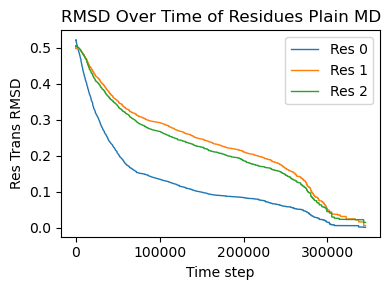

In [4]:
conform_num = 2
thermal_num = 1
res_num = 3

plt.figure(figsize=(4, 3))  

for res in range(res_num):
    x = np.arange(plain_md_errors.shape[1])
    error = plain_md_errors[res]

    plt.plot(x, error, label=f"Res {res}", linewidth=1)

# Customize and show the plot after the loop
#plt.ylim(0.4, 0.8)
plt.xlabel("Time step")
plt.ylabel("Res Trans RMSD")
plt.title("RMSD Over Time of Residues Plain MD")
plt.legend()
plt.tight_layout()
plt.show()


## EE

In [5]:
ee_path = '../EE/analysis'


error_loaded = Data.load(f"{ee_path}/population_data/error_res.pkl").array_list
errors = error_loaded[0]
ee_errors = errors
ee_errors.shape

(3, 91002)

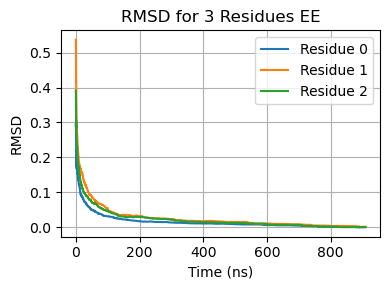

In [6]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns

thermal_num = 1
res_num = 3

plt.figure(figsize=(4, 3))
for i in range(res_num):
    plt.plot(np.arange(ee_errors.shape[1]) * dt_in_ns, ee_errors[i], label=f'Residue {i}')
plt.title("RMSD for 3 Residues EE")
plt.xlabel("Time (ns)")
plt.ylabel("RMSD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## HREX

In [7]:
hrex_path = '../HREX/analysis'

error_loaded = Data.load(f"{hrex_path}/population_data/error_res.pkl").array_list
errors = error_loaded[0]

hrex_errors = errors
hrex_errors.shape

(6, 3, 600030)

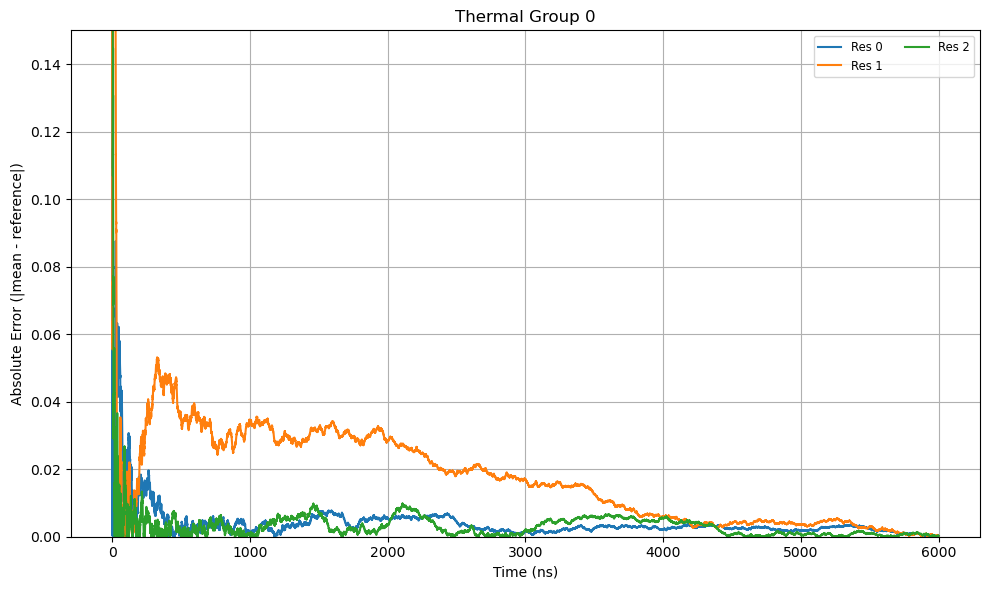

In [8]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns

thermal_num = 1
res_num = 3

for thermal in range(thermal_num):
    time = np.arange(hrex_errors.shape[2])
    time_ns = time * dt_in_ns  # Convert to nanoseconds

    plt.figure(figsize=(10, 6))

    for res in range(res_num):
        error = hrex_errors[thermal][res]
        plt.plot(time_ns, error, label=f'Res {res}')

    plt.ylim(0, 0.15)  # Adjust if needed
    plt.xlabel("Time (ns)")
    plt.ylabel("Absolute Error (|mean - reference|)")
    plt.title(f"Thermal Group {thermal}")
    plt.legend(ncol=2, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## REDs

In [9]:
reds_path = '../REDs/analysis'


error_loaded = Data.load(f"{reds_path}/population_data/error_res.pkl").array_list
errors = error_loaded[0]

reds_errors = errors
reds_errors.shape

(3, 3, 337514)

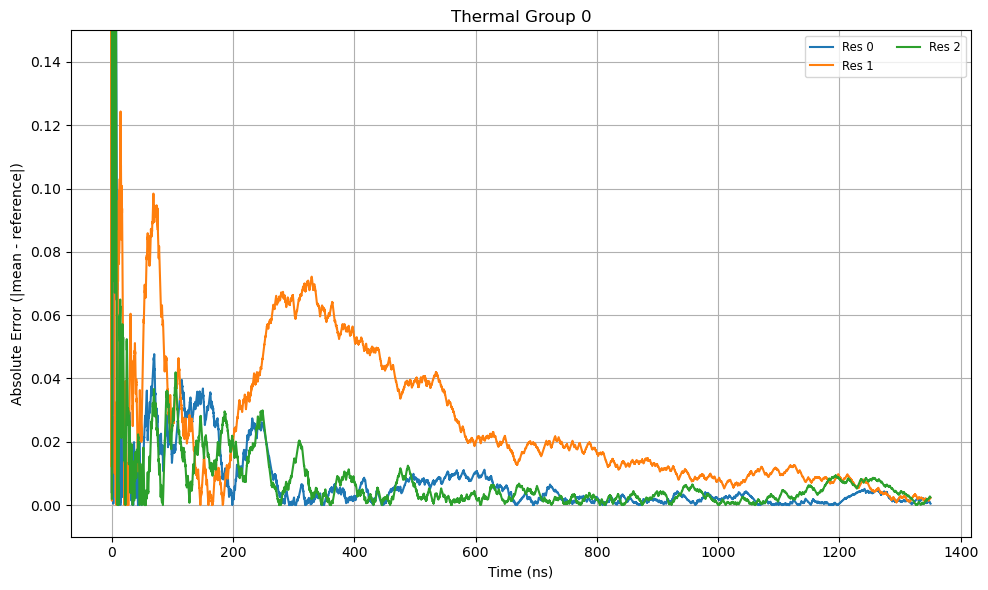

In [10]:
dt_in_ns = 0.004  # 10 ps = 0.01 ns

thermal_num = 1
res_num = 3

for thermal in range(thermal_num):
    time = np.arange(reds_errors.shape[2])
    time_ns = time * dt_in_ns  # Convert to nanoseconds

    plt.figure(figsize=(10, 6))

    for res in range(res_num):
        error = reds_errors[thermal][res]
        
        plt.plot(time_ns, error, label=f'Res {res}')

    plt.ylim(-0.01, 0.15)  # Adjust if needed
    plt.xlabel("Time (ns)")
    plt.ylabel("Absolute Error (|mean - reference|)")
    plt.title(f"Thermal Group {thermal}")
    plt.legend(ncol=2, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Combined Plot

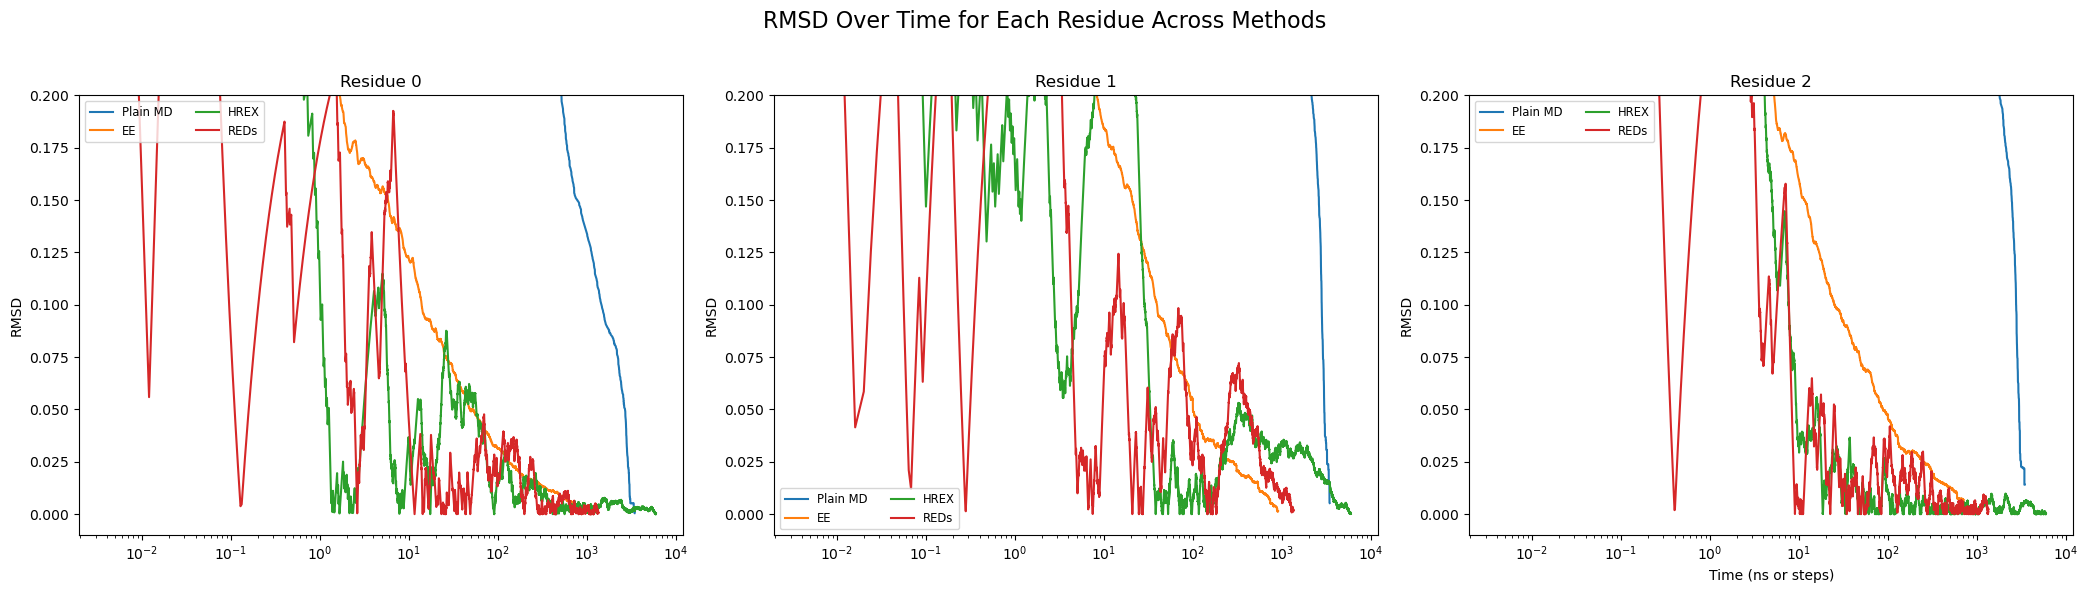

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
res_num = 3
thermal = 0  # Only one thermal state
use_ylim = True
ylim_low = -0.01
ylim_high = 0.2
use_logscale_x = True  # Toggle this to enable log scale on x-axis

# Method properties
method_labels = ['Plain MD', 'EE', 'HREX', 'REDs']
colors = ['C0', 'C1', 'C2', 'C3']

# Time arrays (start from 1 to avoid log(0))
time_md = np.arange(1, plain_md_errors.shape[1] + 1) * 0.01
time_ee = np.arange(1, ee_errors.shape[1] + 1) * 0.01
time_hrex = np.arange(1, hrex_errors.shape[2] + 1) * 0.01
time_reds = np.arange(1, reds_errors.shape[2] + 1) * 0.004

# Create 1x3 subplots (one per residue)
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharex=False)
axes = axes.flatten()

for res in range(res_num):
    ax = axes[res]

    # --- Plain MD ---
    ax.plot(time_md, plain_md_errors[res], label='Plain MD', color=colors[0])

    # --- EE ---
    ax.plot(time_ee, ee_errors[res], label='EE', color=colors[1])

    # --- HREX ---
    ax.plot(time_hrex, hrex_errors[thermal][res], label='HREX', color=colors[2])

    # --- REDs ---
    ax.plot(time_reds, reds_errors[thermal][res], label='REDs', color=colors[3])

    ax.set_title(f'Residue {res}')
    ax.set_ylabel('RMSD')
    if use_logscale_x:
        ax.set_xscale('log')
    if use_ylim:
        ax.set_ylim(ylim_low, ylim_high)
    ax.legend(fontsize='small', ncol=2)

axes[-1].set_xlabel('Time (ns or steps)')
plt.suptitle("RMSD Over Time for Each Residue Across Methods", fontsize=16)
plt.savefig("fig/error_over_time_separate_res_log_scale_plot.pdf", format="pdf")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


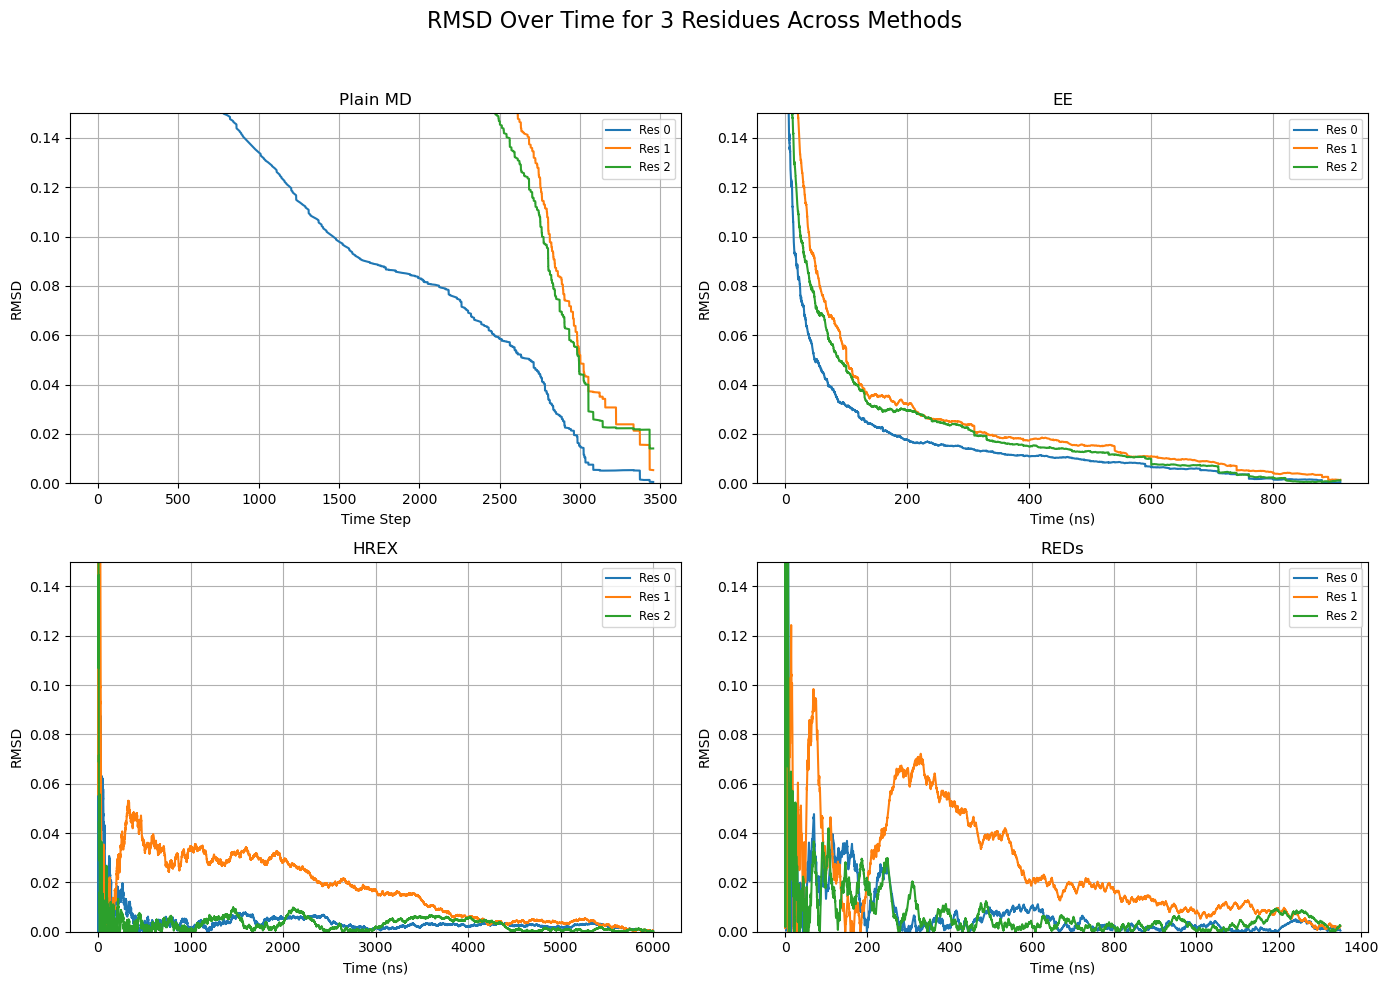

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
res_num = 3
thermal = 0
use_ylim = True
ylim_low = 0.0
ylim_high = 0.15

# Time arrays
time_md = np.arange(plain_md_errors.shape[1]) * 0.01
time_ee = np.arange(ee_errors.shape[1]) * 0.01
time_hrex = np.arange(hrex_errors.shape[2]) * 0.01
time_reds = np.arange(reds_errors.shape[2]) * 0.004

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# --- Plot 1: Plain MD ---
ax = axes[0]
for res in range(res_num):
    ax.plot(time_md, plain_md_errors[res], label=f"Res {res}")
ax.set_title("Plain MD")
ax.set_xlabel("Time Step")
ax.set_ylabel("RMSD")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small')

# --- Plot 2: EE ---
ax = axes[1]
for res in range(res_num):
    ax.plot(time_ee, ee_errors[res], label=f"Res {res}")
ax.set_title("EE")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small')

# --- Plot 3: HREX ---
ax = axes[2]
for res in range(res_num):
    ax.plot(time_hrex, hrex_errors[thermal][res], label=f"Res {res}")
ax.set_title("HREX")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small')

# --- Plot 4: REDs ---
ax = axes[3]
for res in range(res_num):
    ax.plot(time_reds, reds_errors[thermal][res], label=f"Res {res}")
ax.set_title("REDs")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small')

# Final adjustments
plt.suptitle("RMSD Over Time for 3 Residues Across Methods", fontsize=16)
plt.savefig("fig/error_over_time_all_res_plot.pdf", format="pdf")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
